## Set Up Dependencies

In [1]:
!pip install "pecking==0.2.0" "teeplot==1.0.1" "watermark==2.4.3"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import seaborn as sns
import pandas as pd
import pecking
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pecking
from teeplot import teeplot as tp

## Data Retrieval and Preprocessing

In [3]:
df = pd.read_csv("https://osf.io/m8qy7/download")

In [4]:
df["Num Reconstructed Inner Nodes"] = df["num_reconstructed_inner_nodes"]
df["Num True Inner Nodes"] = df["num_true_inner_nodes"]
df["Raw Triplet Distance"] = df["triplet_distance_raw"]
df["Sampled Triplet Distance Strict"] = df["sampled_triplet_distance_strict"]
df["Sampled Triplet Distance Lax"] = df["sampled_triplet_distance_lax"]
df["Annotation Size (bits)"] = df["annotation_size_bits"]
df["Algorithm"] = df["algorithm"]
df["Population Size"] = df["population_size"]
df["Num Generations"] = df["num_generations"]
df["Num Islands"] = df["num_islands"]
df["Num Niches"] = df["num_niches"]
df["Tournament Size"] = df["tournament_size"]
df["Replicate"] = df["replicate"]


In [5]:
df["Inner Node Resolution"] = df["Num Reconstructed Inner Nodes"] / df["Num True Inner Nodes"]
df["Inner Node Loss"] = 1 - df["Inner Node Resolution"]

In [6]:
df["Dynamics"] = "islands" + df["Num Islands"].astype(str) + "-niches" + df["Num Niches"].astype(str) + "-tsize" + df["Tournament Size"].astype(str)

In [7]:
df["Scale"] = "npop" + df["Population Size"].astype(str) + "-ngen" + df["Num Generations"].astype(str)

In [8]:
df["Triplet\nDistance"] = df["Raw Triplet Distance"]
df["Sampled\nTriplet\nDistance\nStrict"] = df["Sampled Triplet Distance Strict"]
df["Sampled\nTriplet\nDistance\nLax"] = df["Sampled Triplet Distance Lax"]
df["Inner\nNode\nResolution"] = df["Inner Node Resolution"]
df["Inner\nNode\nLoss"] = df["Inner Node Loss"]
df["Num\nReconstructed\nInner\nNodes"] = df["Num Reconstructed Inner Nodes"]
df["Num\nTrue\nInner\nNodes"] = df["Num True Inner Nodes"]

In [9]:
df["Scenario"] = df["Dynamics"].map(
    {
        "islands1-niches1-tsize2": "plain",
        "islands1-niches1-tsize1": "drift",
        "islands4-niches2-tsize2": "spatial/ecological mild",
        "islands64-niches8-tsize2": "spatial/ecological strong",
    }
)

In [10]:
dfx = df.melt(
    id_vars=["Algorithm", "Annotation Size (bits)", "Dynamics", "Scenario", "Scale", "Population Size", "Num Generations", "Num Islands", "Num Niches", "Tournament Size", "Replicate"],
    value_vars=["Triplet\nDistance", "Sampled\nTriplet\nDistance\nStrict", "Sampled\nTriplet\nDistance\nLax", "Inner\nNode\nLoss"],
)
dfx.head()


,Algorithm,Annotation Size (bits),Dynamics,Scenario,Scale,Population Size,Num Generations,Num Islands,Num Niches,Tournament Size,Replicate,variable,value
0,new-hybrid,256,islands1-niches1-tsize1,drift,npop1024-ngen10000,1024,10000,1,1,1,0,Triplet\nDistance,0.000421
1,new-hybrid,256,islands1-niches1-tsize1,drift,npop1024-ngen10000,1024,10000,1,1,1,10,Triplet\nDistance,0.187203
2,new-hybrid,256,islands1-niches1-tsize1,drift,npop1024-ngen10000,1024,10000,1,1,1,11,Triplet\nDistance,0.010212
3,new-hybrid,256,islands1-niches1-tsize1,drift,npop1024-ngen10000,1024,10000,1,1,1,12,Triplet\nDistance,0.013390
4,new-hybrid,256,islands1-niches1-tsize1,drift,npop1024-ngen10000,1024,10000,1,1,1,13,Triplet\nDistance,0.000100


## Visualize Main Metrics

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_l

teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


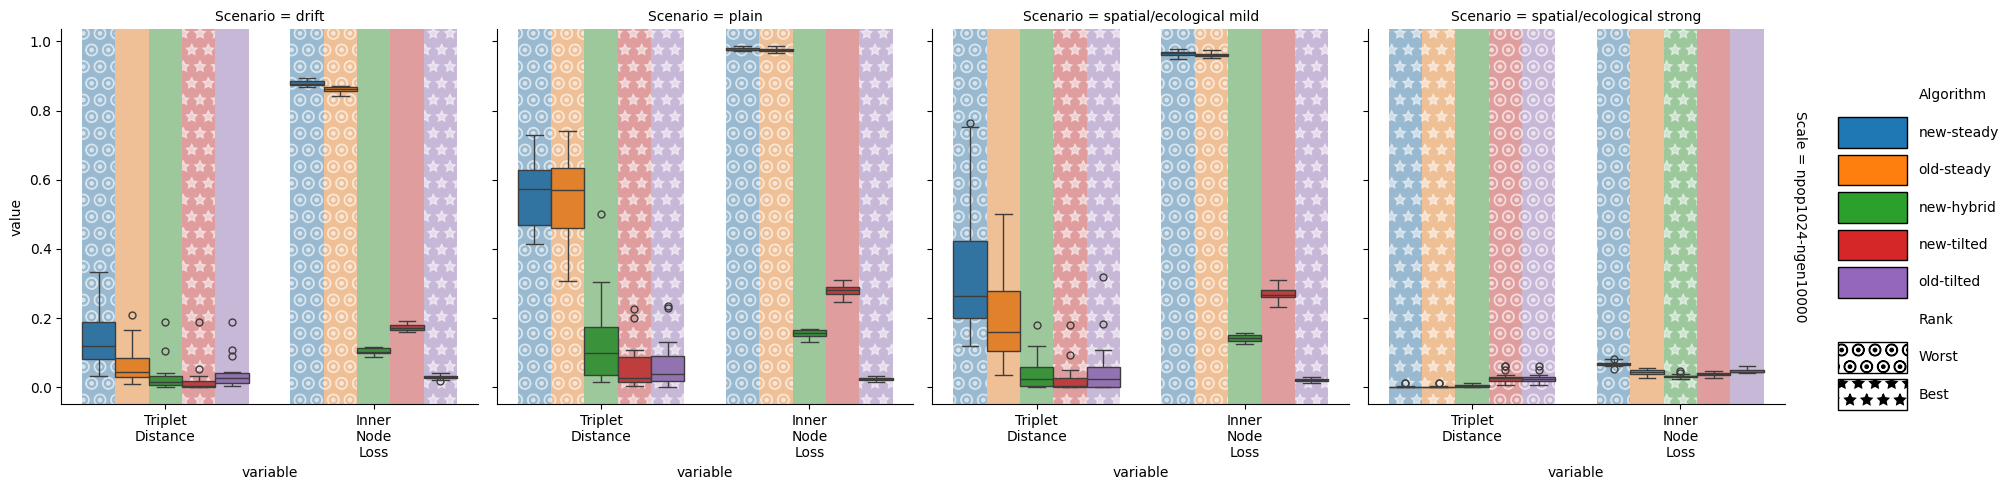

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_l

teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


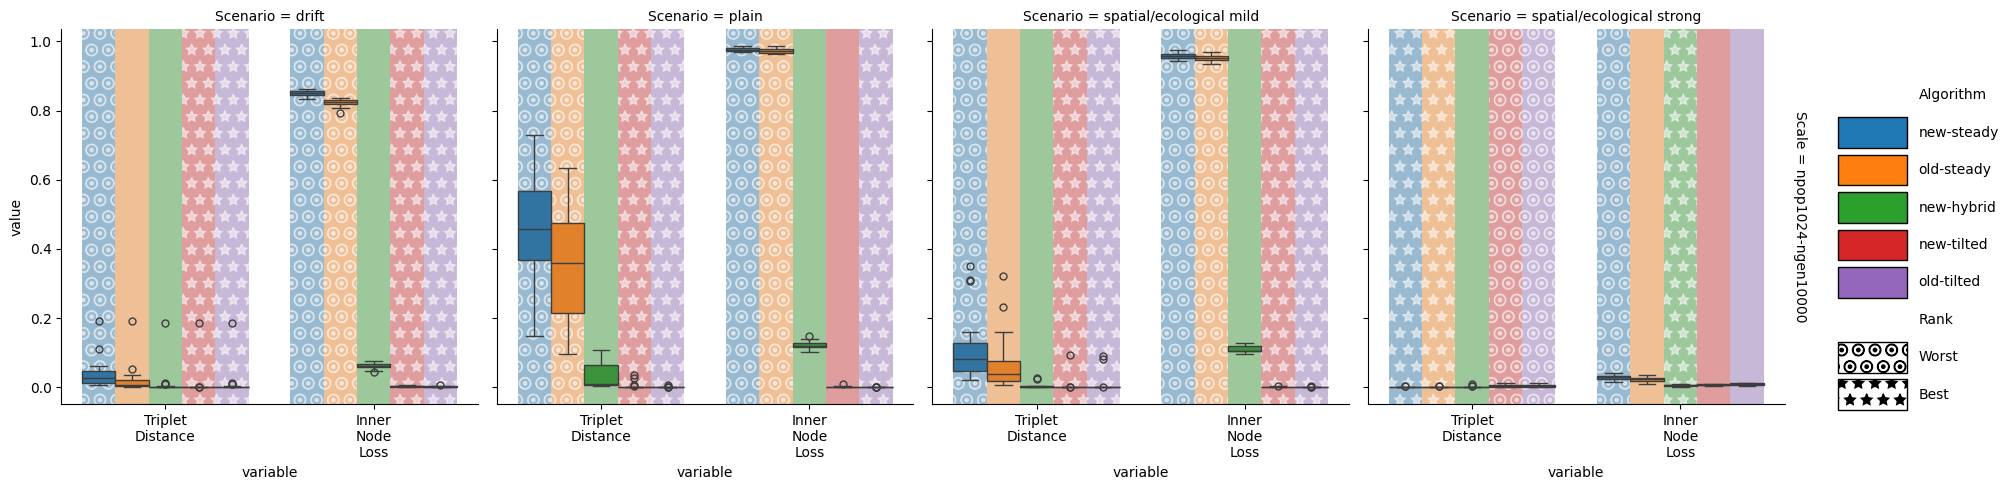

In [11]:
hue_order=[
    "new-steady",
    "old-steady",
    "new-hybrid",
    "new-tilted",
    "old-tilted",
]


for sizebits, group in dfx.groupby("Annotation Size (bits)"):
    tp.tee(
        pecking.peckplot,
        data=group,
        score="value",
        x="variable",
        y="value",
        col="Scenario",
        row="Scale",
        hue="Algorithm",
        x_group="outer",
        order=["Triplet\nDistance", "Inner\nNode\nLoss"],
        hue_order=hue_order,
        skim_hatches=(".O", "*"),
        skim_labels=("Worst", "Best"),
        margin_titles=True,
        legend_width_inches=3,
        teeplot_outattrs={"a": "focal", "sizebits": sizebits},
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Visualize All Metrics

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_l

teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


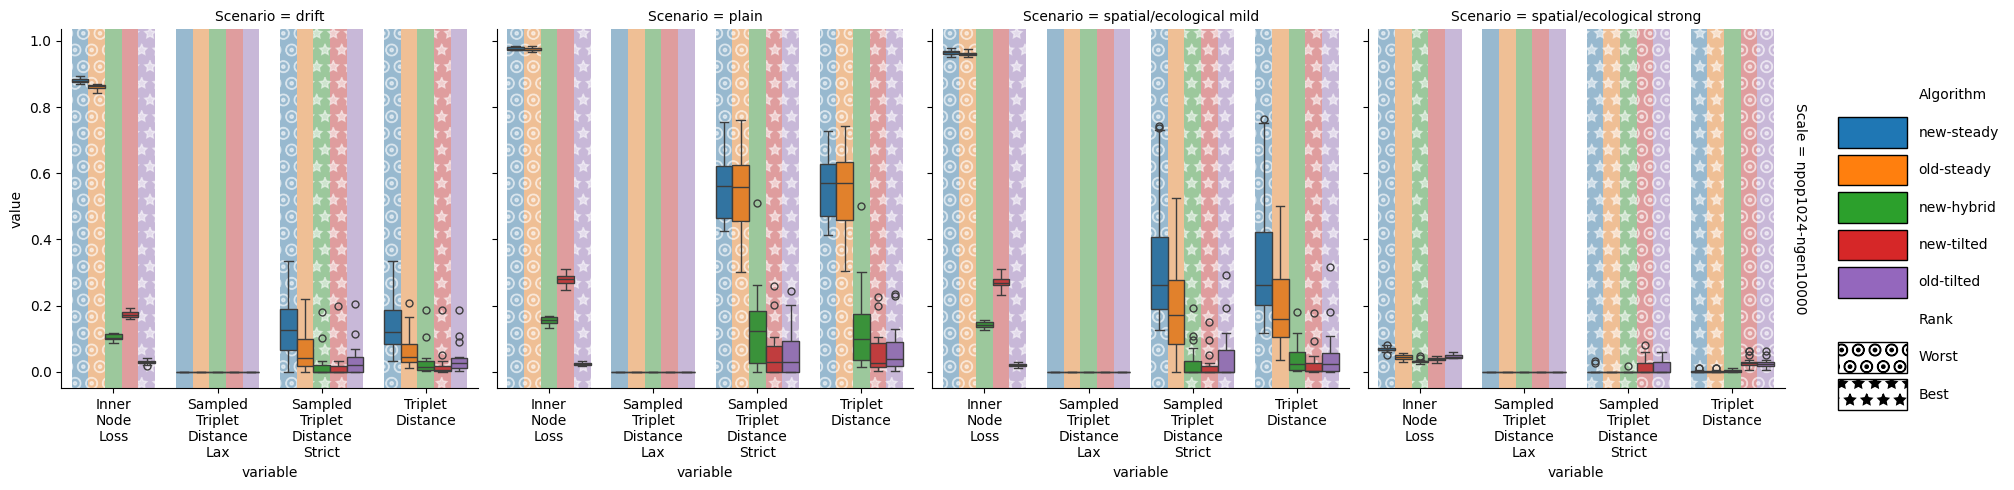

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_l

teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


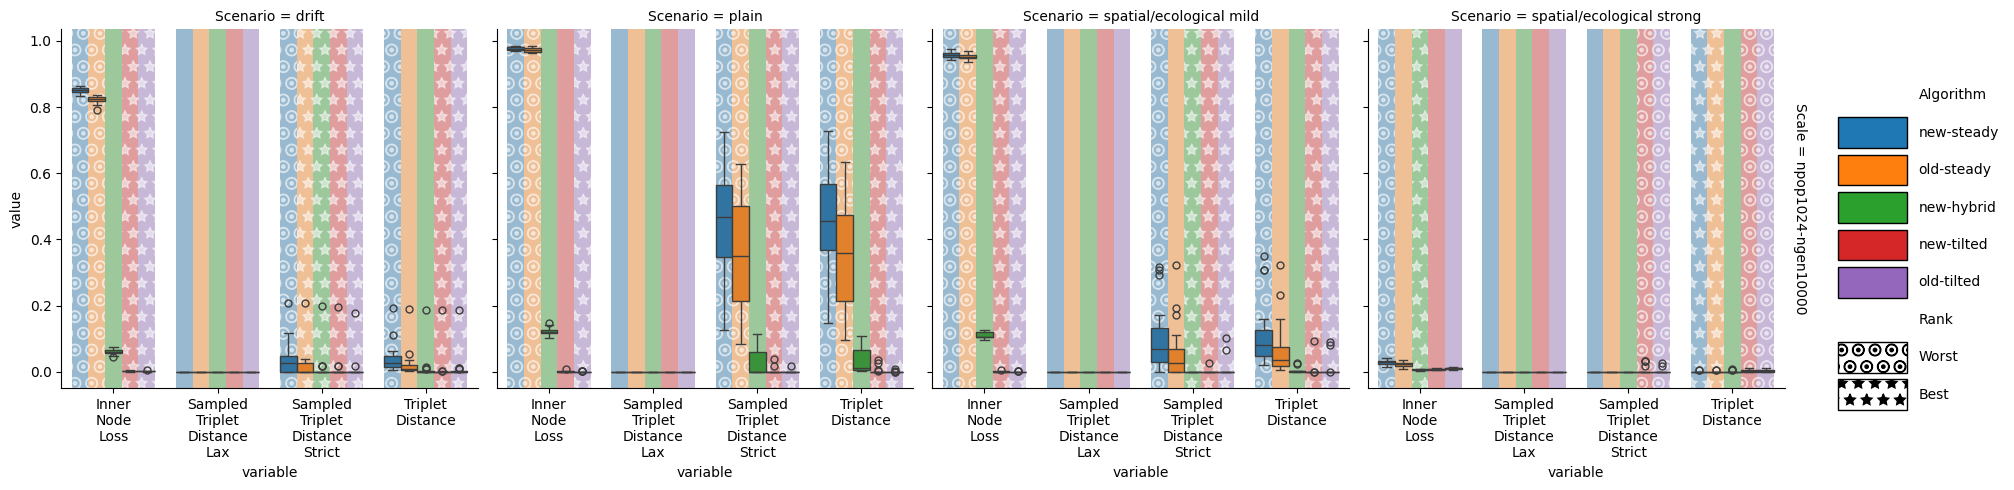

In [12]:
hue_order=[
    "new-steady",
    "old-steady",
    "new-hybrid",
    "new-tilted",
    "old-tilted",
]


for sizebits, group in dfx.groupby("Annotation Size (bits)"):
    tp.tee(
        pecking.peckplot,
        data=group,
        score="value",
        x="variable",
        y="value",
        col="Scenario",
        row="Scale",
        hue="Algorithm",
        x_group="outer",
        hue_order=hue_order,
        skim_hatches=(".O", "*"),
        skim_labels=("Worst", "Best"),
        margin_titles=True,
        legend_width_inches=3,
        teeplot_outattrs={"a": "all", "sizebits": sizebits},
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Reproducibility Information

In [13]:
import datetime

datetime.datetime.now().isoformat()

'2024-02-25T16:43:01.219624'

In [14]:
%load_ext watermark
%watermark

Last updated: 2024-02-25T16:43:01.232727+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.2.0-1019-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [15]:
!pip freeze

alifedata-phyloinformatics-convert==0.16.2
annotated-types==0.6.0
anyio==4.3.0
anytree==2.12.1
argcomplete==3.2.2
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Automat==20.2.0
Babel==2.14.0
backstrip==0.2.4
bcrypt==3.2.0
beautifulsoup4==4.12.3
biopython==1.83
bitarray==2.9.2
bitstring==4.1.4
black==22.10.0
bleach==6.1.0
blinker==1.4
certifi==2024.2.2
cffi==1.16.0
chardet==4.0.0
charset-normalizer==3.3.2
click==8.1.7
cloud-init==23.3.3
colorama==0.4.4
comm==0.2.1
command-not-found==0.3
configobj==5.0.6
constantly==15.1.0
contourpy==1.2.0
cryptography==3.4.8
cycler==0.12.1
dataclasses==0.6
dbus-python==1.2.18
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
DendroPy==4.6.1
Deprecated==1.2.14
distro==1.7.0
distro-info==1.1+ubuntu0.2
distutils-strtobool==0.1.0
ete3==3.1.3
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.49.0
fqdn==1.5.1
frozendict==2.4.0
gitdb==4.0.11
GitPython==3.1.42
h11==0.14.0
hs